<a href="https://colab.research.google.com/github/sosullivan7221/HHA_506_Class9/blob/main/507_WK3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3

## Import Packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, pearsonr

## Load dataset

In [2]:
# Dataset containing information with blood pressure and cardoovascular information, as well as some potential risk factors

## Uses 1 and 0 to indicate Yes/No responses, as well as indicated 1 for female and 0 for male in the sex columns. Columns with no units to measure will be ignored

df = pd.read_csv('/content/datasets/data.csv')

df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


## Univariate Analysis

In [3]:
# Descriptive Stats for the Entire Dataset

df.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.0000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.5050,0.443500
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.5001,0.496922
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.0000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,1.0000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.0000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000


In [4]:
# The two columns we are going to focus on are 'Level_of_Hemoglobin' and 'BMI', so we will highlight those

dfHemoglobin = df['Level_of_Hemoglobin']
dfHemoglobin.describe()

count    2000.000000
mean       11.710035
std         2.186701
min         8.100000
25%        10.147500
50%        11.330000
75%        12.945000
max        17.560000
Name: Level_of_Hemoglobin, dtype: float64

In [5]:
dfBMI = df['BMI']
dfBMI.describe()

count    2000.000000
mean       30.081500
std        11.761208
min        10.000000
25%        20.000000
50%        30.000000
75%        40.000000
max        50.000000
Name: BMI, dtype: float64

### IQR for Outlier Detection

In [13]:
# Hemoglobin Levels

q1 = np.percentile(dfHemoglobin, 25)
q3 = np.percentile(dfHemoglobin, 75)
iqr = q3 - q1

threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

outliers = [x for x in dfHemoglobin if x < threshold_lower or x > threshold_upper]

print('Outliers:', outliers)

Outliers: [17.51, 17.3, 17.52, 17.52, 17.31, 17.45, 17.44, 17.54, 17.39, 17.48, 17.44, 17.32, 17.2, 17.15, 17.35, 17.44, 17.56, 17.22, 17.15, 17.53, 17.17]


In [11]:
# BMI

q1 = np.percentile(dfBMI, 25)
q3 = np.percentile(dfBMI, 75)
iqr = q3 - q1

threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

outliers = [x for x in dfBMI if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: []


### Histograms

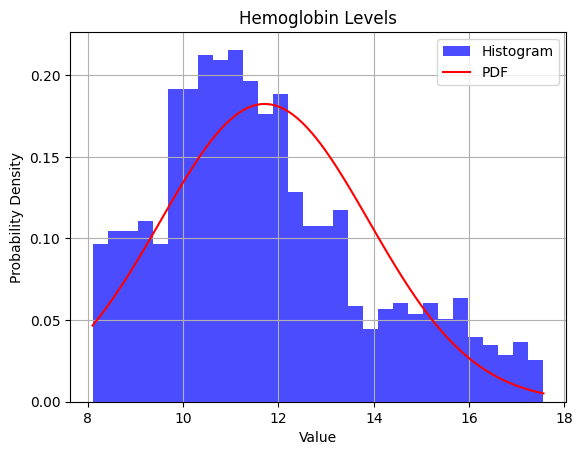

In [6]:
# Hemoglobin Level Histogram

mean = 11.710035  # Mean value
std_dev = 2.186701 # Standard deviation
num_samples = 2000  # Number of data points

# Create a histogram
plt.hist(dfHemoglobin, bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Create a probability density function (PDF) curve
x = np.linspace(min(dfHemoglobin), max(dfHemoglobin), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('Hemoglobin Levels')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Skew and Kurtosis

skewness = skew(dfHemoglobin)
kurt = kurtosis(dfHemoglobin, fisher=False)

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: 0.6565731919434775
Kurtosis: 2.8131739209397026


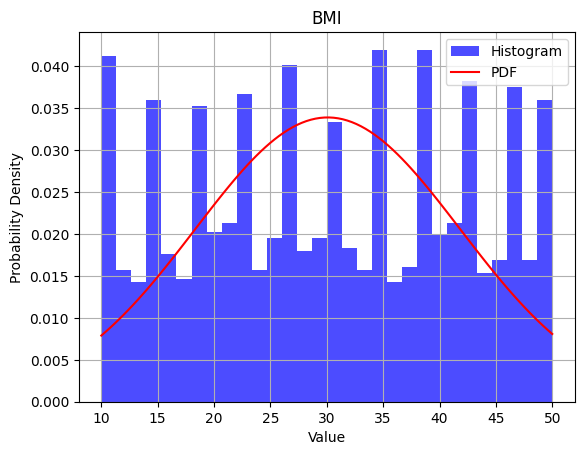

In [7]:
# BMI Histogram

mean = 30.0815  # Mean value
std_dev = 11.761208 # Standard deviation
num_samples = 2000  # Number of data points

# Create a histogram
plt.hist(dfBMI, bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Create a probability density function (PDF) curve
x = np.linspace(min(dfBMI), max(dfBMI), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('BMI')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Skew and Kurtosis

skewness = skew(dfBMI)
kurt = kurtosis(dfBMI, fisher=False)

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: -0.017542304750953433
Kurtosis: 1.8173350395966958


#### Analysis

Hemoglobin Levels follow a right skew distribution, while the BMI graph shows a number of peaks at evenly spaced intervals. It is likely that this dataset has some if not all fabiracted data for the purpose of analysis practice. We can also see this odd distribution in the quartiles, with the minimum value exactly at 10.0, 25% at 20.0, 50% at 30.0, 75% at 40.0, and the maximum value at 50.0.

Outliers were kept in the dataset as they are likely not input errors. These outliers also fall into the normal range of hemoglobin ranges for males, although it is near the upper limit.

## Bivariate Analysis

### Scatterplot of Hemoglobin vs BMI

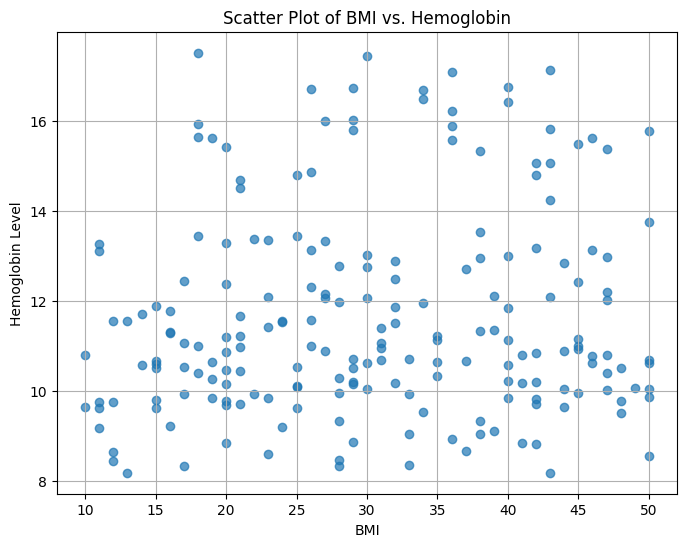

In [39]:
scatterdata= df.sample(200)

plt.figure(figsize=(8, 6))
plt.scatter(scatterdata['BMI'], scatterdata['Level_of_Hemoglobin'], alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Hemoglobin Level')
plt.title('Scatter Plot of BMI vs. Hemoglobin')
plt.grid()
plt.show()



### Correlational Coefficients

In [50]:
# Correlation Coefficient and P-Value

pearson_corr, p_value = pearsonr(dfBMI, dfHemoglobin)

print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")
print(f"P-value: {p_value}")



Pearson Correlation Coefficient: 0.12
P-value: 1.2414204272222555e-07


In [43]:
# Covariance

covariance = dfBMI.cov(dfHemoglobin)
print(f"Covariance between BMI and Hemoglobin Levels: {covariance}")

Covariance between BMI and Hemoglobin Levels: 3.031888091545773
